In [10]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.lines import *
from matplotlib.patches import *
from matplotlib.text import *
from matplotlib.image import *
import seaborn as sns
import squarify
import plotly.express as px
import plotly.graph_objs as go
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [ ]:
#Dirty Dataset - Part 1

In [3]:
df = pd.read_csv("Data_Analyst_Sample.csv")

In [ ]:
# Display the first 5 rows of the dataframe
print(df.head())

In [ ]:
# Display the last 5 rows of the dataframe
print(df.tail())

In [ ]:
# Display some basic statistical information about the dataframe
print(df.describe())

In [ ]:
df.shape

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

In [ ]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

In [21]:
df = df.dropna(subset=df.select_dtypes(include=['object']).columns, how='any')

In [24]:
df.update(df[df.select_dtypes(include=['int', 'float']).columns].fillna(0))

In [ ]:
for col in df.select_dtypes(include=['int', 'float']).columns:
    df[col].fillna(0, inplace=True)

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

In [ ]:
df.notnull().all()

In [ ]:
#Dirty Dataset - part 2

In [8]:

# read the errors.csv file into a dataframe
errors_df = pd.read_csv("errors.csv")

In [9]:
# read the Data_Analyst_Sample.csv file into a dataframe
data_df = pd.read_csv("Data_Analyst_Sample.csv")

In [10]:
# count the number of errors in the dataset
error_count = 0
data_df["Campaign Name"] = data_df["Campaign Name"].astype(str)
for i, row in errors_df.iterrows():
    if data_df["Campaign Name"].str.contains(row["Campaign error name"]).any():
        error_count += 1
        # use the .replace() method to correct the errors
        data_df["Campaign Name"].replace(row["Campaign error name"], row["Campaign correct"], inplace=True)

print("Number of errors found:", error_count)

Number of errors found: 4


In [ ]:
# verify the errors have been corrected
print("Errors corrected:", error_count)

In [118]:
# export the corrected "Campaign Name" column to a .csv file
data_df[["Campaign Name"]].to_csv("corrected_campaign_names.csv", index=False)

In [27]:
#Core Learning 3 - Exploratory Data Analysis (EDA)

In [17]:
# Reading the csv file and storing it in a variable named 'data'
data = pd.read_csv('./Superstore_data_sample.csv')

In [ ]:
# Exploration methods

In [ ]:
# Using the head() method to display the first 5 rows of the data
print(data.head())

In [ ]:
# Using the describe() method to display the statistical summary of the numerical columns
print(data.describe())

In [ ]:
# Using the info() method to display the information of the dataframe
print(data.info())

In [ ]:
# check the shape of the data (rows, columns)
print(data.shape)

In [ ]:
# check the columns with missing values
print(data.isnull().sum())

In [ ]:
# Data Cleaning

In [21]:
# Remove missing values from columns with object datatype
df = data.dropna(subset=data.select_dtypes(include=['object']).columns, how='any')

In [22]:
# Replace missing values with zero in columns with numeric datatype
df = df.fillna(0)

In [ ]:
# verify that there are no missing values
print(df.isnull().sum().sum()) # prints the total number of missing values in the dataframe

In [ ]:
#Core Learning 3 - Exploratory Data Analysis (EDA) - continued

In [79]:
# Question one: Which category (furniture, office supplies and technology) has the most products? and of each category, how many products are there?

In [ ]:
# total number of rows and columns 
print(data.shape)

In [ ]:
# show first five rows
print(data.head)

In [5]:
# group the 'Product Name' column by 'Category' and 'Sub-Category'
grouped = data.groupby(['Category', 'Sub-Category'])['Product Name'].size()

# print the result
print(grouped)

Category         Sub-Category
Furniture        Bookcases        228
                 Chairs           617
                 Furnishings      957
                 Tables           319
Office Supplies  Appliances       466
                 Art              796
                 Binders         1523
                 Envelopes        254
                 Fasteners        217
                 Labels           364
                 Paper           1370
                 Storage          846
                 Supplies         190
Technology       Accessories      775
                 Copiers           68
                 Machines         115
                 Phones           889
Name: Product Name, dtype: int64


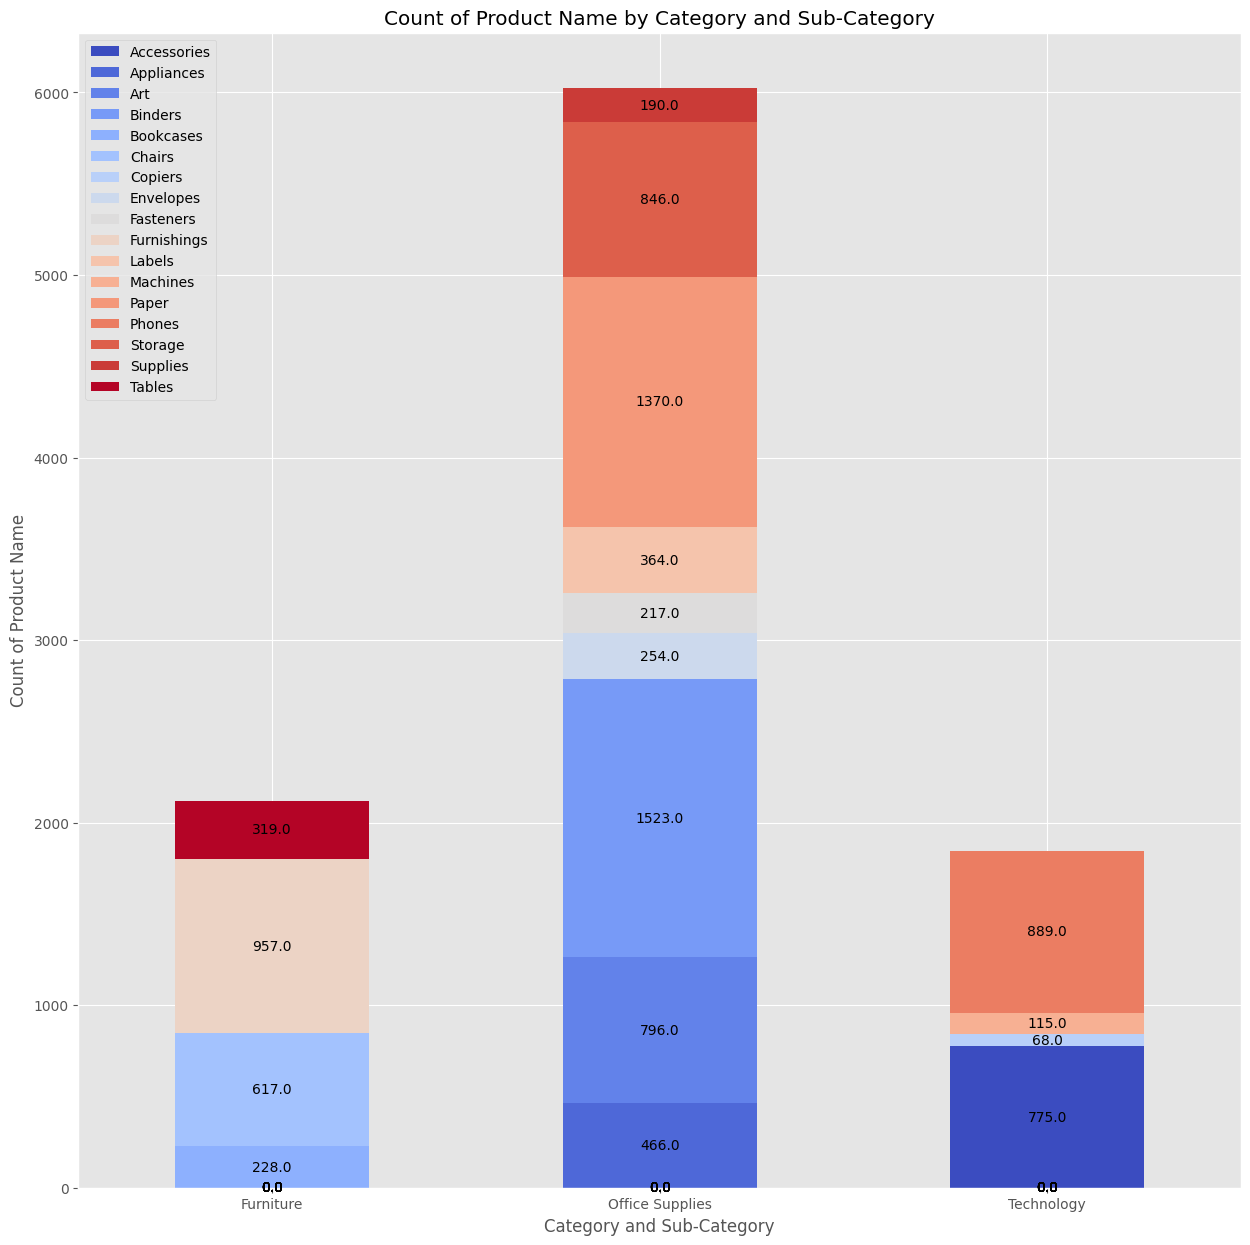

In [62]:

# Create a stacked bar chart
grouped.unstack().plot(kind='bar', stacked=True, figsize=(15, 15), colormap='coolwarm')

# Find the axis of the graph
ax = plt.gca()

#selects the position of the bar on the x axis
for i in ax.containers:
    #for each stack on the x axis
    for j in i:
        #get the x and y center position of each stack and plot the values in that position
        ax.text(j.get_x() + j.get_width()/2., j.get_y() + j.get_height()/2., str(j.get_height()), 
                ha='center', va='center', rotation=0)

# Rotate x-axis labels
plt.xticks(rotation=0)

# Add labels and title
plt.xlabel('Category and Sub-Category')
plt.ylabel('Count of Product Name')
plt.title('Count of Product Name by Category and Sub-Category')

# change location of the legend
plt.legend(loc='upper left')

# draw the stacked bar chart
plt.show()

In [77]:
# group the data by the category column
grouped_data = data.groupby("Category")

# count the number of products within each category
product_count = grouped_data["Product ID"].count().reset_index(name='count')

# print the result
print(product_count)

          Category  count
0        Furniture   2121
1  Office Supplies   6026
2       Technology   1847


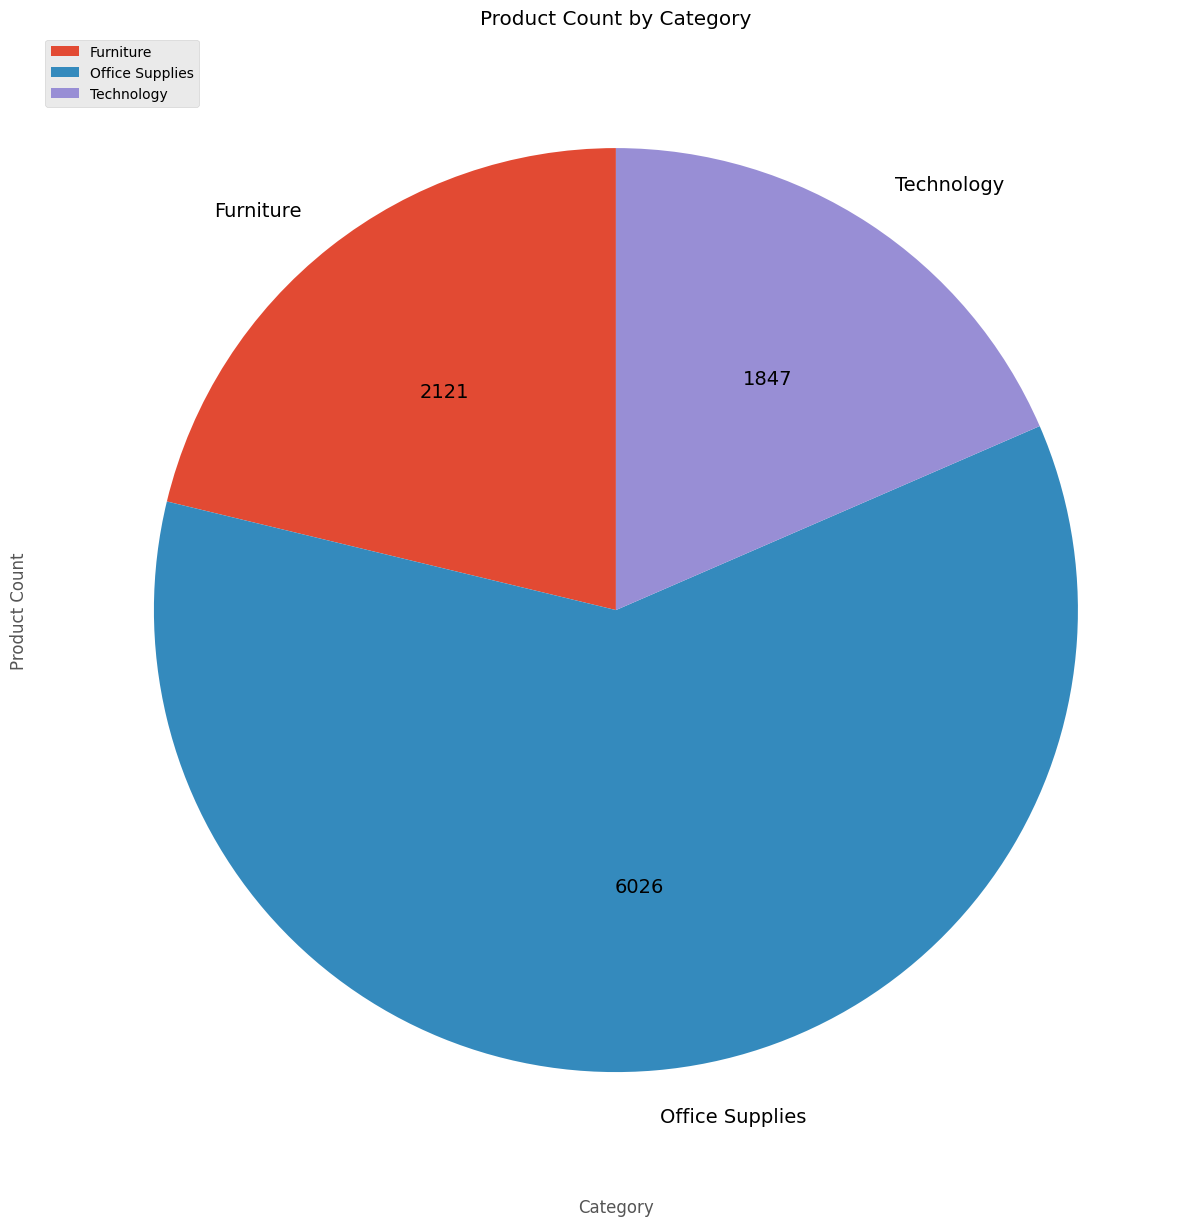

In [80]:
# create a pie chart of the product count by category
product_count.plot(kind='pie', y='count', labels=product_count['Category'], 
                   autopct=lambda p : '{:.0f}'.format(p * sum(product_count['count']) / 100),
                   startangle=90, shadow=False, legend = False, fontsize=14, figsize=(15, 15))

# change location of the legend
plt.legend(loc='upper left')

# add a title and labels
plt.title("Product Count by Category")
plt.xlabel("Category")
plt.ylabel("Product Count")

# show the chart
plt.show()


In [21]:
# create a violin plot of the product count by category
sns.violinplot(x="Category", y="Product ID", data=data)

# add a title and labels
plt.title("Product Count by Category")
plt.xlabel("Category")
plt.ylabel("Product Count")

# show the chart
plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [ ]:
#Pie Chart

In [72]:
# group data by categories
grouped_cat = df.groupby(['Category'],['Sub'])['Product Name'].count()

# plot the first chart
plt.pie(grouped_cat, labels=grouped_cat.index, autopct='%1.1f%%', startangle=90, counterclock=False)

# plot the second chart
plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%', startangle=90, counterclock=False, wedgeprops=dict(width=0.4))

# Add title
plt.title('Count of Product Name by Category and Sub-Category')

plt.show()

NameError: name 'df' is not defined

In [66]:
# group the 'Product Name' column by 'Category' and 'Sub-Category'
grouped_two = data.groupby(['State', 'Category', 'Sub-Category'])['Sales'].sum()


In [67]:
# print the result
print(grouped_two)

State      Category         Sub-Category
Alabama    Furniture        Chairs          3915.540
                            Furnishings       40.480
                            Tables          2376.460
           Office Supplies  Appliances       208.160
                            Art              301.210
                                              ...   
Wisconsin  Office Supplies  Storage         1007.160
                            Supplies          21.810
           Technology       Accessories     4795.480
                            Phones          4002.680
Wyoming    Furniture        Chairs          1603.136
Name: Sales, Length: 656, dtype: float64


In [68]:
# Needed to check the data type of the dataset
type(grouped_two)

pandas.core.series.Series

In [184]:
# found its series so converted the series to a Dataframe
grouped_two_df = grouped_two.to_frame()

In [219]:
# checking the data type of the new dataset
type(grouped_two_df)

pandas.core.frame.DataFrame

In [56]:
# print the new dataset
print(grouped_two_df)

Category               Furniture                                    \
Sub-Category           Bookcases     Chairs Furnishings     Tables   
State                                                                
Alabama                      NaN   3915.540      40.480   2376.460   
Arizona                 519.2130   6499.080    2511.648   3995.350   
Arkansas                638.8200   1673.280     573.490    301.960   
California            27558.5215  63079.368   19996.480  45430.232   
Colorado               1583.5230   8244.816    1957.568   1457.130   
Connecticut            1682.7400   2782.420     457.470    252.357   
Delaware               2051.7300   1559.920     637.390    510.279   
District of Columbia         NaN   1267.530      79.050        NaN   
Florida                2587.0560  11168.816    3746.192   5484.974   
Georgia                3793.5000   1858.160    1805.080    864.740   
Idaho                        NaN    338.352     432.320   1824.810   
Illinois            

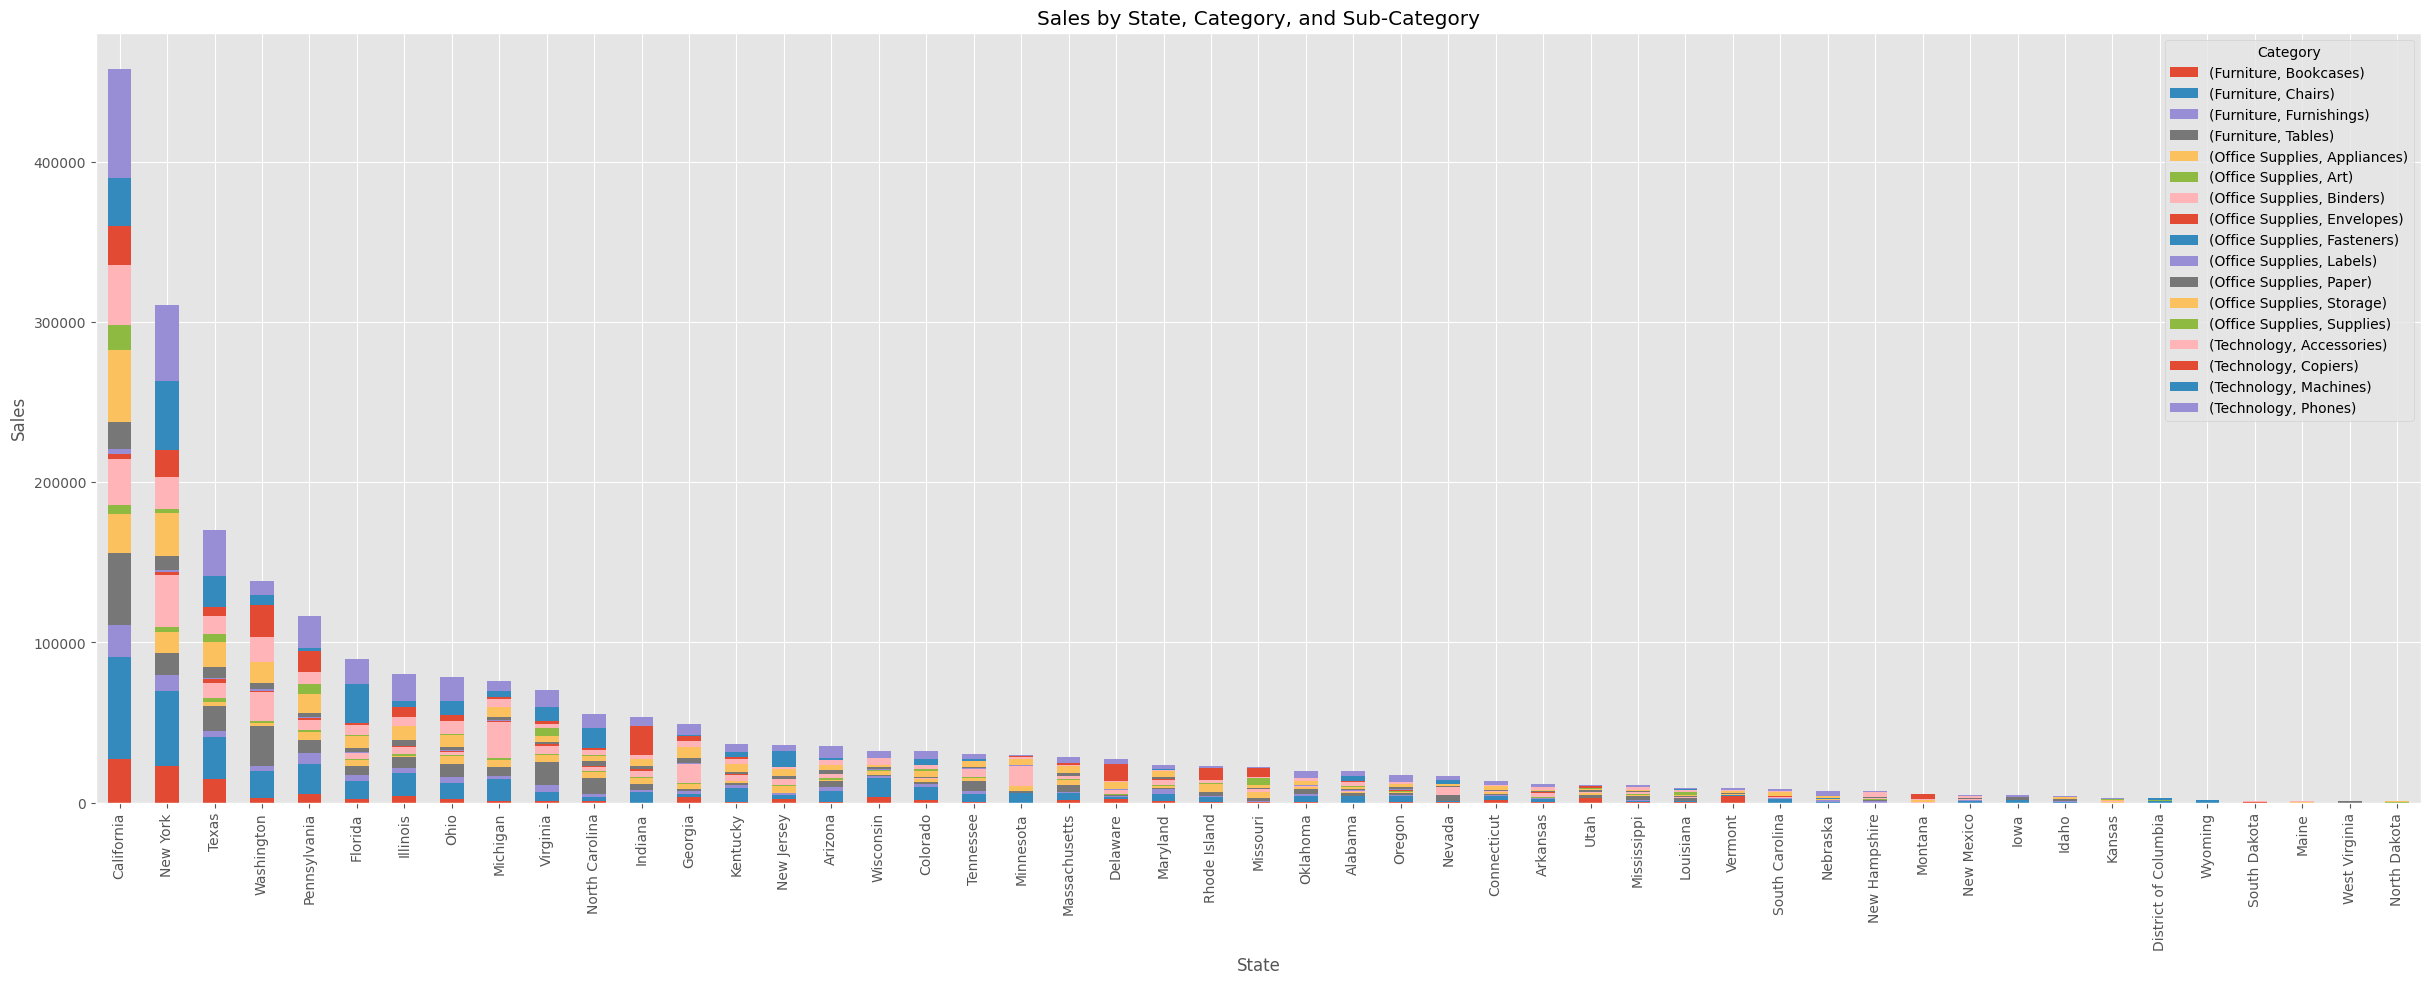

In [36]:
# group the data by 'State' and sum the 'Sales'
grouped_by_state = grouped_two_df.sum(axis=1)

# sort the data by 'Sales' in ascending order
grouped_by_state = grouped_by_state.sort_values(ascending=False)

# use the sorted data to plot the graph
grouped_two_df.loc[grouped_by_state.index].plot(kind='bar', stacked=True, figsize=(30, 10))
plt.xlabel('State')
plt.ylabel('Sales')
plt.title('Sales by State, Category, and Sub-Category')
plt.legend(title='Category')
plt.show()


State
California              457629.2515
New York                310872.9910
Texas                   170167.2458
Washington              138641.2700
Pennsylvania            116511.9140
Florida                  89473.7080
Illinois                 80166.1010
Ohio                     78258.1360
Michigan                 76269.6140
Virginia                 70636.7200
North Carolina           55603.1640
Indiana                  53555.3600
Georgia                  49095.8400
Kentucky                 36591.7500
New Jersey               35764.3120
Arizona                  35282.0010
Wisconsin                32114.6100
Colorado                 32029.5180
Tennessee                30661.8730
Minnesota                29863.1500
Massachusetts            28634.4340
Delaware                 27451.0690
Maryland                 23705.5230
Rhode Island             22627.9560
Missouri                 22205.1500
Oklahoma                 19683.3900
Alabama                  19493.9000
Oregon                

In [ ]:
# Random

In [83]:
# import the data file
df = pd.read_csv('Superstore_data_sample.csv')

In [ ]:
# check data types
print(df.dtypes)

In [ ]:
# check for missing values
print(df.isnull().sum())

In [86]:
# drop duplicate values
df = df.drop_duplicates()

In [ ]:
# check for missing values
print(df.isnull().sum())

In [88]:
# drop unnecessary columns
df = df.drop(['Row ID','Order ID','Customer ID','Product ID'], axis=1)

In [89]:
# standardize date columns
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

In [90]:
# remove outliers
df = df[df['Profit'] > 0]

In [ ]:
# group data by category
category_group = df.groupby(by='Category').sum()

In [92]:
# create a new column that contains the values of sales and profit as a tuple
df['Sales_Profit'] = list(zip(df.Sales, df.Profit))

In [93]:
# reshape the dataframe in long format
df = pd.melt(df, id_vars=['Category'], value_vars=['Sales', 'Profit'], var_name='sales_profit', value_name='value')

In [ ]:
# create a catplot
g = sns.catplot(x='Category', y='value', hue='sales_profit', kind='bar', data=df, height=5, aspect=2)

# add title and labels
plt.title("Sales and Profits by Category")
plt.xlabel("Category")
plt.ylabel("Value")

# add y values on top of each bar and round it to the nearest .0
for i in g.ax.containers:
    for j in i:
        g.ax.text(j.get_x() + j.get_width()/2., j.get_height()/2-10, round(j.get_height(),1), ha='center', va='bottom')

# show the plot
plt.show()